## Importing Packages

In [1]:
import fastf1
import fastf1.plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fastf1.plotting.setup_mpl()

## Loading Session Data

In [2]:
year = 2021
race = "British Grand Prix"

session = fastf1.get_session(year, race, 'R')
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (494.71 MB) C:\Users\odath\AppData\Local\Temp\fastf1
core           INFO 	Loading data for British Grand Prix - Race [v3.7.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching tra

## Loading and Preparing Lap Data

In [3]:
laps = session.laps
laps = laps.sort_values(['Driver', 'LapNumber'])
laps['LapTimeSeconds'] = laps['LapTime'].dt.total_seconds()
laps.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTimeSeconds
312,0 days 01:04:35.154000,ALO,14,0 days 00:02:12.307000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:42.485000,...,Alpine,0 days 01:02:22.559000,2021-07-18 14:03:22.569,124,7.0,False,,False,False,132.307
313,0 days 01:07:18.616000,ALO,14,NaT,2.0,1.0,NaT,0 days 01:07:11.073000,0 days 00:00:44.486000,0 days 00:01:10.123000,...,Alpine,0 days 01:04:35.154000,2021-07-18 14:05:35.164,45,7.0,False,,False,False,NaN
314,0 days 01:44:32.082000,ALO,14,NaT,3.0,2.0,0 days 01:41:29.571000,NaT,NaT,0 days 00:01:13.489000,...,Alpine,0 days 01:41:00.104000,2021-07-18 14:42:00.114,1,7.0,False,,False,False,NaN
315,0 days 01:46:56.675000,ALO,14,0 days 00:02:24.593000,4.0,2.0,NaT,NaT,0 days 00:01:18.985000,0 days 00:00:39.455000,...,Alpine,0 days 01:44:32.082000,2021-07-18 14:45:32.092,12,6.0,False,,False,True,144.593
316,0 days 01:48:32.301000,ALO,14,0 days 00:01:35.626000,5.0,2.0,NaT,NaT,0 days 00:00:29.995000,0 days 00:00:39.323000,...,Alpine,0 days 01:46:56.675000,2021-07-18 14:47:56.685,1,7.0,False,,False,True,95.626


## Compound color map

In [4]:
COMPOUND_COLORS = {
    'SOFT': '#FF3333',
    'MEDIUM': '#FFD700',
    'HARD': "#C6BFBF",
    'INTERMEDIATE': '#39B54A',
    'WET': '#0077FF'
}

## Race Statergy Comparison between different drivers

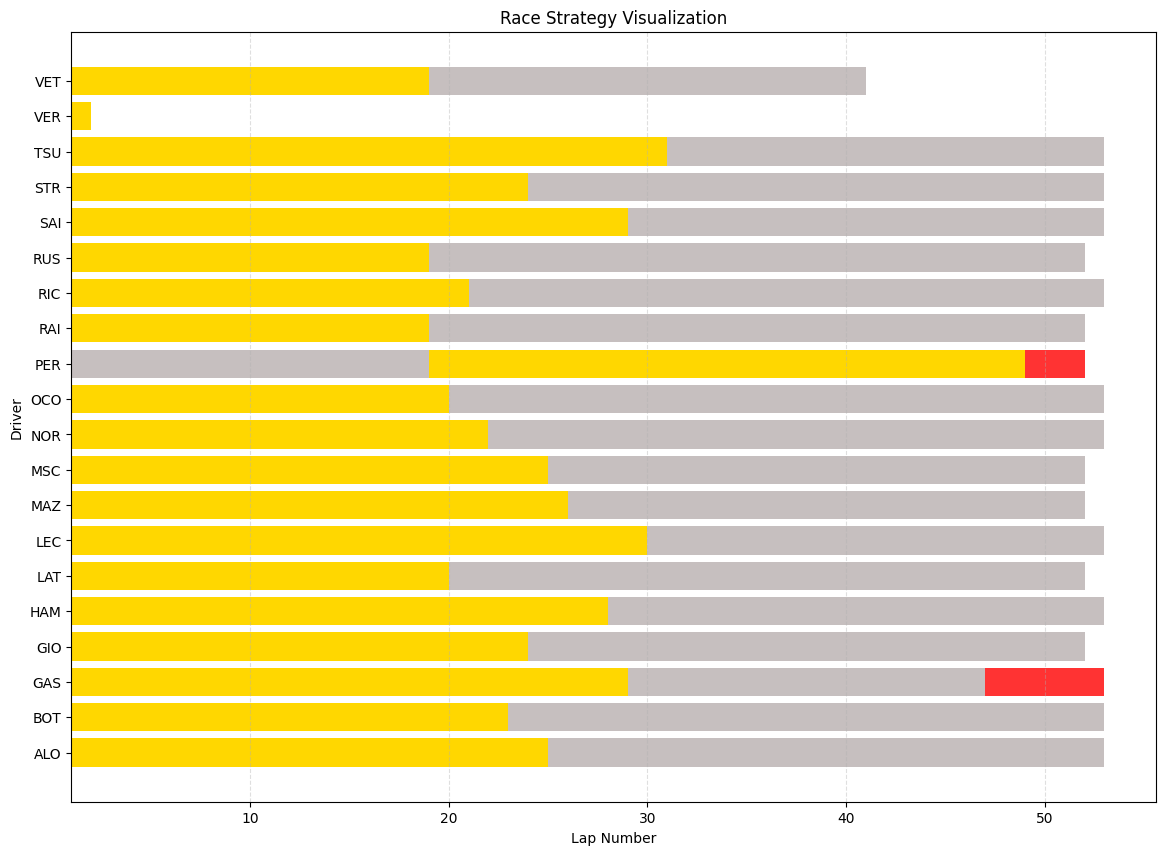

In [5]:
drivers = laps['Driver'].unique()

fig, ax = plt.subplots(figsize=(14,10))

for driver in drivers:
    stints = laps[laps['Driver'] == driver].groupby('Stint')
    
    for stint, data in stints:
        compound = data['Compound'].iloc[0]
        ax.barh(
            driver,
            len(data),
            left=data['LapNumber'].min(),
            color=COMPOUND_COLORS.get(compound, '#AAAAAA')
        )

ax.set_xlabel("Lap Number")
ax.set_ylabel("Driver")
ax.set_title("Race Strategy Visualization")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()
